Data Retrieval 

In [8]:
import csv
import pandas as pd
import math
import matplotlib.pyplot as plt 

df = pd.read_csv("./data.csv", delimiter=',', header=None, names=['Case_Manager', 'Date_of_Enrollment', 'Service_Requested_and_Offered', 'Date2', 'Comments1', 'Comments2', 'Comments3'])
managers = df.Case_Manager.values[3:].tolist()
dates = df.Date_of_Enrollment.values[3:].tolist()
services = df.Service_Requested_and_Offered[3:].tolist()
comments1 = df.Comments1[3:].tolist()
comments2 = df.Comments2[3:].tolist()
comments3 = df.Comments3[3:].tolist()

# print(comments3)
# print(dates)

Cleaning Data

In [9]:
cleanedManagers = []
cleanedDates = []
cleanedServices = []
cleanedComments = []

def appendComs(comment, ret):
    if not (type(comment) == float and math.isnan(comment)):
        ret += ' ' + comment
    return ret

for i in range(0, len(managers)):
    if not (type(dates[i]) == float and math.isnan(dates[i])):
        cleanedManagers.append(managers[i])
        cleanedDates.append(dates[i])
        cleanedServices.append(services[i])
        cleanedComments.append(appendComs(comments3[i], appendComs(comments2[i], appendComs(comments1[i], ''))))
        
# print(len(cleanedServices))

Functions for Searching and Graphing Data

In [10]:
def search(searchParams, val):
    for i in range(0, len(cleanedServices)):    
        if type(cleanedServices[i]) == str:
            services = cleanedServices[i].lower()
            comments = cleanedComments[i].lower()
            for param in searchParams:
                if param in services or param in comments:
                    val+=1
                    break
                
    return val

def create_graph(data, x, y, title):
    keys = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (10, 5))
    plt.bar(keys, values, color ='royalblue', width = 0.4)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.show()

Finding Data Related to Housing

---Sober Housing---
The amount of people in sober housing is 151.
The percentage of sober housing is 34.31818%.
---Single Housing---
The amount of people in single housing is 4.
The percentage of single housing is 0.90909%.
---Affordable Housing---
The amount of people in affordable housing is 0.
The percentage of affordable housing is 0.0%.
---Traditional Housing---
The amount of people in traditional housing is 0.
The percentage of traditional housing is 0.0%.


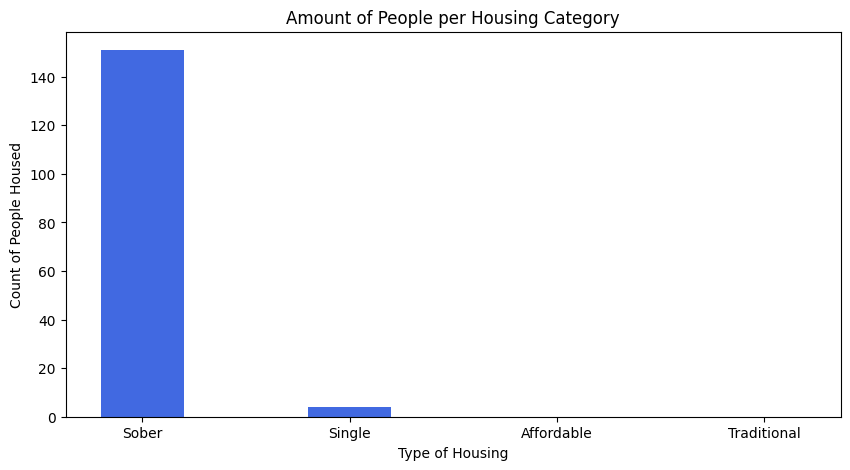

In [11]:
soberHousingCount = search(['sober'], 0)
singleHousingCount = search(['single'], 0)
affordHousingCount = search(['affordable'], 0)
traditionalHousingCount = search(['traditional'], 0)

print("---Sober Housing---")        
print("The amount of people in sober housing is {0}.".format(soberHousingCount))
print("The percentage of sober housing is {0}%.".format(round(soberHousingCount/float(len(cleanedServices))*100, 5)))

print("---Single Housing---")   
print("The amount of people in single housing is {0}.".format(singleHousingCount))
print("The percentage of single housing is {0}%.".format(round(singleHousingCount/float(len(cleanedServices))*100, 5)))

print("---Affordable Housing---")   
print("The amount of people in affordable housing is {0}.".format(affordHousingCount))
print("The percentage of affordable housing is {0}%.".format(round(affordHousingCount/float(len(cleanedServices))*100, 5)))

print("---Traditional Housing---")   
print("The amount of people in traditional housing is {0}.".format(traditionalHousingCount))
print("The percentage of traditional housing is {0}%.".format(round(traditionalHousingCount/float(len(cleanedServices))*100, 5)))

data = {
    'Sober': soberHousingCount,
    'Single': singleHousingCount,
    'Affordable': affordHousingCount,
    'Traditional': traditionalHousingCount
}
create_graph(data, "Type of Housing", "Count of People Housed", "Amount of People per Housing Category")

Finding Data Related to Public Benefits

---SNAP---
The amount of people helped via SNAP is 2.
The percentage of SNAP is 0.45455%.
---TANF---
The amount of people helped via TANF is 0.
The percentage of TANF is 0.0%.
---SSI/SSDI---
The amount of people helped via SSI/SSDI is 56.
The percentage of SSI/SSDI is 12.72727%.
---EAEDC---
The amount of people helped via EAEDC is 0.
The percentage of EAEDC is 0.0%.
---TAFDC---
The amount of people helped via TAFDC is 0.
The percentage of TAFDC is 0.0%.


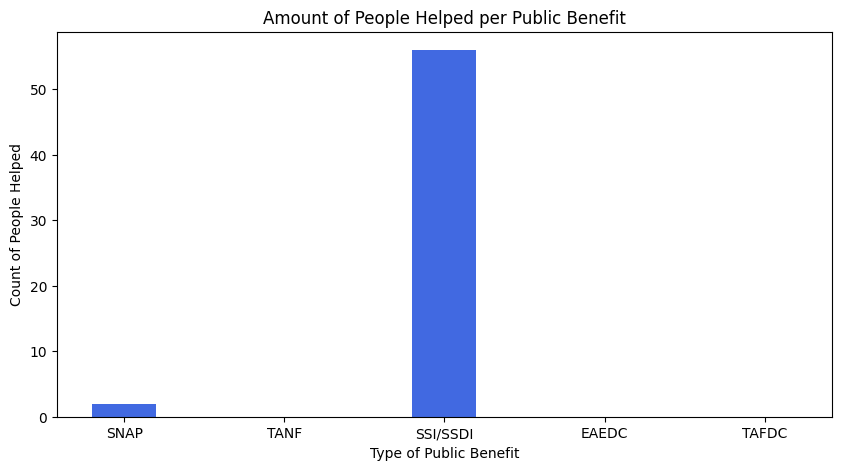

In [12]:
snapCount = search(['snap'], 0)
tanfCount = search(['tanf'], 0)
ssiAndSsdiCount = search(['ssi', 'ssdi'], 0)
eaedcCount = search(['eaedc'], 0)
tafdcCount = search(['tafdc'], 0)

print("---SNAP---")        
print("The amount of people helped via SNAP is {0}.".format(snapCount))
print("The percentage of SNAP is {0}%.".format(round(snapCount/float(len(cleanedServices))*100, 5)))

print("---TANF---")   
print("The amount of people helped via TANF is {0}.".format(tanfCount))
print("The percentage of TANF is {0}%.".format(round(tanfCount/float(len(cleanedServices))*100, 5)))

print("---SSI/SSDI---")   
print("The amount of people helped via SSI/SSDI is {0}.".format(ssiAndSsdiCount))
print("The percentage of SSI/SSDI is {0}%.".format(round(ssiAndSsdiCount/float(len(cleanedServices))*100, 5)))

print("---EAEDC---")   
print("The amount of people helped via EAEDC is {0}.".format(eaedcCount))
print("The percentage of EAEDC is {0}%.".format(round(eaedcCount/float(len(cleanedServices))*100, 5)))

print("---TAFDC---")   
print("The amount of people helped via TAFDC is {0}.".format(tafdcCount))
print("The percentage of TAFDC is {0}%.".format(round(tafdcCount/float(len(cleanedServices))*100, 5)))

data = {
    'SNAP': snapCount,
    'TANF': tanfCount,
    'SSI/SSDI': ssiAndSsdiCount,
    'EAEDC': eaedcCount,
    'TAFDC': tafdcCount
}
create_graph(data, "Type of Public Benefit", "Count of People Helped", "Amount of People Helped per Public Benefit")

Finding Data Related to Job Placement/Training

---Mass Hiring---
The amount of people helped via mass hiring is 3.
The percentage of sober housing is 0.68182%.
---Mass Cultivated---
The amount of people helped via mass cultivated is 1.
The percentage of single housing is 0.22727%.
---Park Department---
The amount of people helped via park department is 3.
The percentage of park department is 0.68182%.


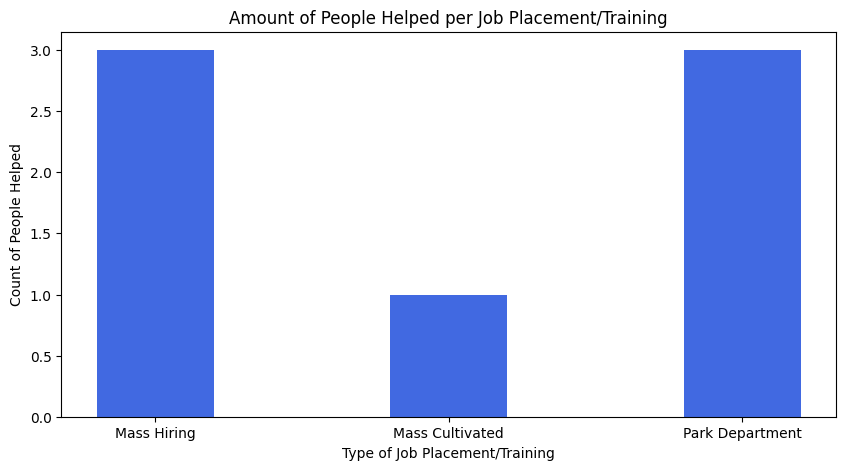

In [13]:
massHireCount = search(['mass hire', 'masshire'], 0)
massCultivatedCount = search(['mass cultivate', 'cultivate', 'masscultivate'], 0)
parkCount = search(['park'], 0)

print("---Mass Hiring---")        
print("The amount of people helped via mass hiring is {0}.".format(massHireCount))
print("The percentage of sober housing is {0}%.".format(round(massHireCount/float(len(cleanedServices))*100, 5)))

print("---Mass Cultivated---")   
print("The amount of people helped via mass cultivated is {0}.".format(massCultivatedCount))
print("The percentage of single housing is {0}%.".format(round(massCultivatedCount/float(len(cleanedServices))*100, 5)))

print("---Park Department---")   
print("The amount of people helped via park department is {0}.".format(parkCount))
print("The percentage of park department is {0}%.".format(round(parkCount/float(len(cleanedServices))*100, 5)))

data = {
    'Mass Hiring': massHireCount,
    'Mass Cultivated': massCultivatedCount,
    'Park Department': parkCount
}
create_graph(data, "Type of Job Placement/Training", "Count of People Helped", "Amount of People Helped per Job Placement/Training")
